In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
for col in df.columns:
  df = df[df[col] != '?']

In [ ]:
df.shape

(45222, 15)

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
educational-num,int64
marital-status,object
occupation,object
relationship,object
race,object
gender,object


In [ ]:
num_cols = df.select_dtypes(include=np.number).columns

In [ ]:
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
not_num_cols = []
for col in df.columns:
  if col not in num_cols:
    not_num_cols.append(col)

print(not_num_cols)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in not_num_cols:
  df[col] = le.fit_transform(df[col])

<Axes: ylabel='age'>

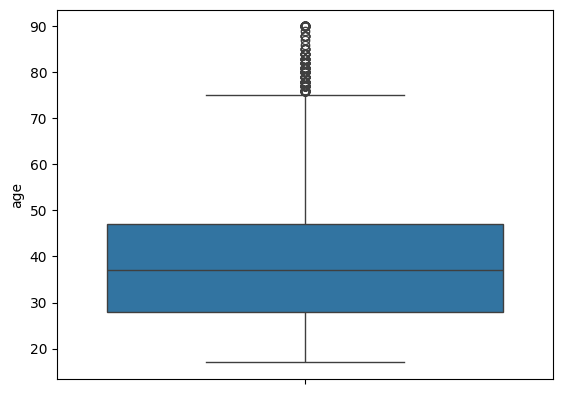

In [ ]:
import seaborn as sns

sns.boxplot(data=df['age'])

<Axes: ylabel='fnlwgt'>

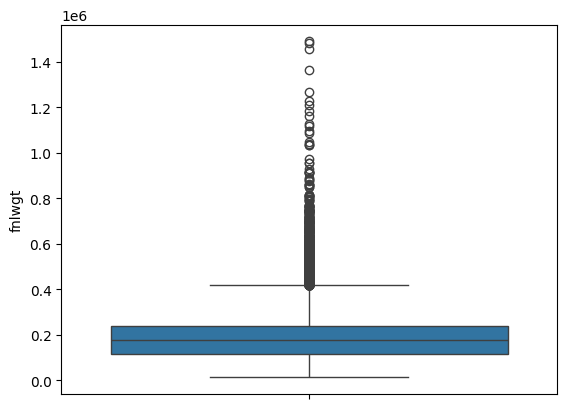

In [ ]:
sns.boxplot(data=df['fnlwgt'])

<Axes: ylabel='fnlwgt'>

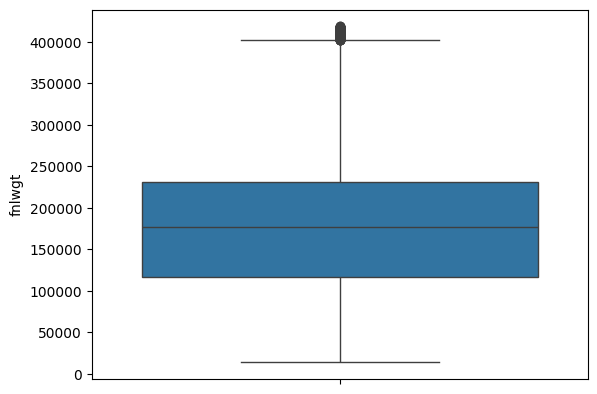

In [ ]:
sns.boxplot(data=df['fnlwgt'])

In [ ]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

for col in num_cols:
  df = df[(df[col] >= lower[col])&(df[col] <= upper[col])]

In [ ]:
df.shape

(27713, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled = sc.fit_transform(df[num_cols])

In [ ]:
df_scaled = df.copy()

df_scaled[num_cols] = scaled

In [ ]:
print(df_scaled)

            age  workclass    fnlwgt  education  educational-num  \
0     -1.024983          2  0.350889          1        -1.221559   
1     -0.041455          2 -0.945878         11        -0.438122   
2     -0.798015          1  1.393592          7         0.737034   
3      0.412481          2 -0.278420         15        -0.046403   
5     -0.344079          2  0.084802          0        -1.613277   
...         ...        ...       ...        ...              ...   
48837 -0.873671          2  0.639611          7         0.737034   
48838  0.109857          2 -0.334735         11        -0.438122   
48839  1.471665          2 -0.358060         11        -0.438122   
48840 -1.251951          2  0.111279         11        -0.438122   
48841  1.017729          3  0.929516         11        -0.438122   

       marital-status  occupation  relationship  race  gender  capital-gain  \
0                   4           6             3     2       1     -0.146733   
1                   2    

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

X = df_scaled.drop('income', axis=1)
y = df_scaled['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
lr = LogisticRegression(max_iter=100000)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(accuracy_score(y_pred_lr, y_test))

0.8211166390270868


In [83]:
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_pred_nb, y_test))

0.7988944168048646
